In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

data_path = './data'

train = pd.read_csv(os.path.join(data_path, 'train.csv'))
test = pd.read_csv(os.path.join(data_path, 'test.csv'))

In [9]:
import pickle

with open('./result/f1_score/train_set_f1_scores.pkl', 'rb') as file:
    train_set_f1 = pickle.load(file)
with open('./result/f1_score/val_set_f1_scores.pkl', 'rb') as file:
    val_set_f1 = pickle.load(file)
with open('./result/recall/train_set_recall_scores.pkl', 'rb') as file:
    train_set_recall = pickle.load(file)
with open('./result/recall/val_set_recall_scores.pkl', 'rb') as file:
    val_set_recall = pickle.load(file)

with open('./result/f1_score/ct_train_set_f1_scores.pkl', 'rb') as file:
    ct_train_set_f1 = pickle.load(file)
with open('./result/f1_score/ct_val_set_f1_scores.pkl', 'rb') as file:
    ct_val_set_f1 = pickle.load(file)
with open('./result/recall/ct_train_set_recall_scores.pkl', 'rb') as file:
    ct_train_set_recall = pickle.load(file)
with open('./result/recall/ct_val_set_recall_scores.pkl', 'rb') as file:
    ct_val_set_recall = pickle.load(file)

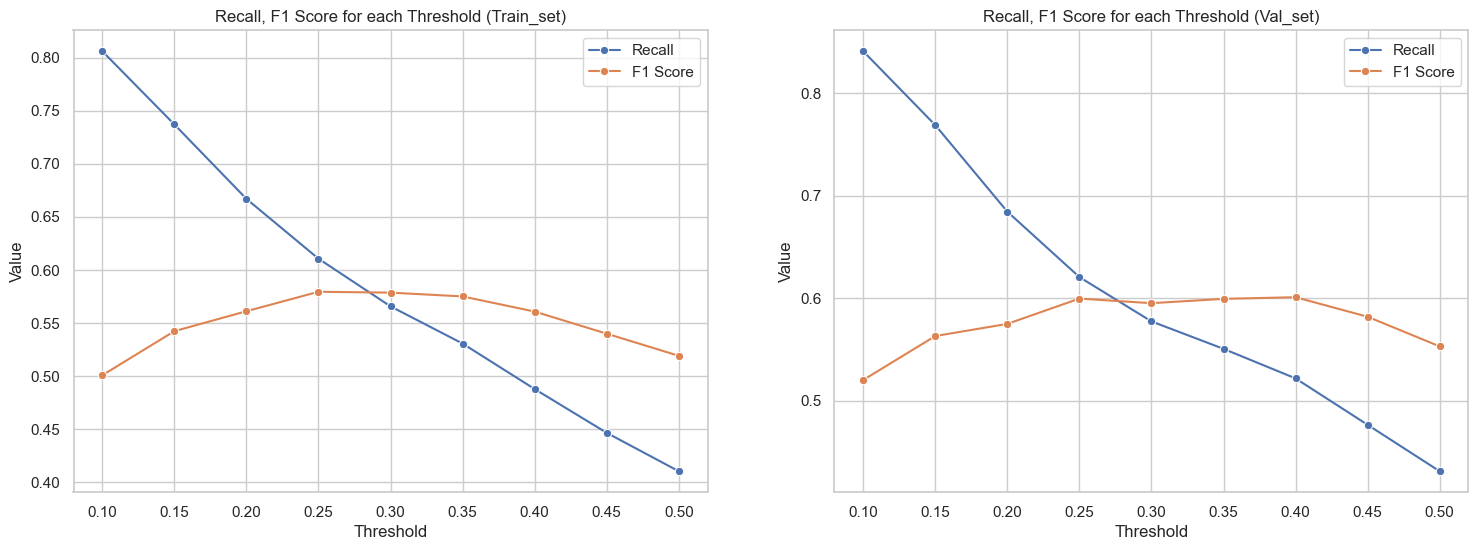

In [48]:
train_set_f1_mean = []
train_set_recall_mean = []

thresholds = sorted(train_set_f1.keys())
for threshold in thresholds:
    train_set_f1_mean.append(sum(train_set_f1[threshold])/len(train_set_f1[threshold]))
    train_set_recall_mean.append(sum(train_set_recall[threshold])/len(train_set_recall[threshold]))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(ax=axes[0], x=thresholds, y=train_set_recall_mean, label="Recall", marker='o')
sns.lineplot(ax=axes[0], x=thresholds, y=train_set_f1_mean, label="F1 Score", marker='o')

axes[0].set_title('Recall, F1 Score for each Threshold (Train_set)')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Value')

sns.lineplot(ax=axes[1], x=thresholds, y=[l[0] for l in list(val_set_recall.values())[::-1]], label="Recall", marker='o')
sns.lineplot(ax=axes[1], x=thresholds, y=[l[0] for l in list(val_set_f1.values())[::-1]], label="F1 Score", marker='o')

axes[1].set_title('Recall, F1 Score for each Threshold (Val_set)')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Value')

plt.show()


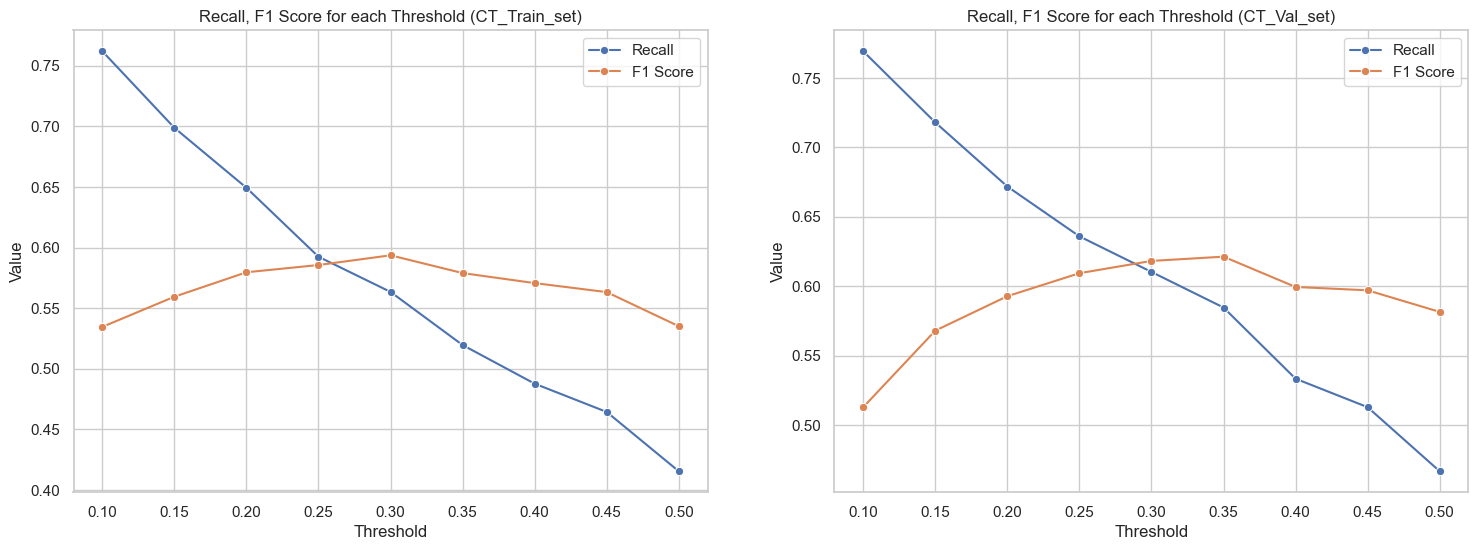

In [50]:
ct_train_set_f1_mean = []
ct_train_set_recall_mean = []

thresholds = sorted(ct_train_set_f1.keys())
for threshold in thresholds:
    ct_train_set_f1_mean.append(sum(ct_train_set_f1[threshold])/len(ct_train_set_f1[threshold]))
    ct_train_set_recall_mean.append(sum(ct_train_set_recall[threshold])/len(ct_train_set_recall[threshold]))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(ax=axes[0], x=thresholds, y=ct_train_set_recall_mean, label="Recall", marker='o')
sns.lineplot(ax=axes[0], x=thresholds, y=ct_train_set_f1_mean, label="F1 Score", marker='o')

axes[0].set_title('Recall, F1 Score for each Threshold (CT_Train_set)')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Value')

sns.lineplot(ax=axes[1], x=thresholds, y=[l[0] for l in list(ct_val_set_recall.values())[::-1]], label="Recall", marker='o')
sns.lineplot(ax=axes[1], x=thresholds, y=[l[0] for l in list(ct_val_set_f1.values())[::-1]], label="F1 Score", marker='o')

axes[1].set_title('Recall, F1 Score for each Threshold (CT_Val_set)')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Value')

plt.show()
